In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import pandas as pd
import scipy.stats as stats 
import scipy.special as scpysp

#read dataset
data = pd.read_csv('../dataset/crime.csv',encoding='iso-8859-1',low_memory = False)

Min ,Max ,Mean ,Std ,Mode ,Median ,Var ,Skew ,Kurtosis

In [2]:
#Simpan data yang dimanipulasi
manps = data

In [3]:
# Mendapatkan min, max, mean, std
data.describe() 

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

In [4]:
data.mode()

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I162030584        3006.0  Motor Vehicle Accident Response   
1             NaN           NaN                              NaN   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0  SICK/INJURED/MEDICAL - PERSON       B2                       Y   
1                            NaN      NaN            NaN      NaN   

      OCCURRED_ON_DATE    YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2016-08-01 00:00:00  2017.0    8.0      Friday  17.0  Part Three   
1  2017-06-01 00:00:00     NaN    NaN         NaN   NaN         NaN   

          STREET        Lat       Long                  Location  
0  WASHINGTON ST  42.348624 -71.082776  (0.00000000, 0.00000000)  
1            NaN        NaN        NaN                       NaN

In [5]:
data.median()

OFFENSE_CODE    2907.000000
YEAR            2017.000000
MONTH              7.000000
HOUR              14.000000
Lat               42.325552
Long             -71.077493
dtype: float64

In [6]:
data.var()

OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

In [7]:
data.skew()

OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

In [8]:
data.kurtosis()

OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

Plot Data dengan Hist dan Boxplot

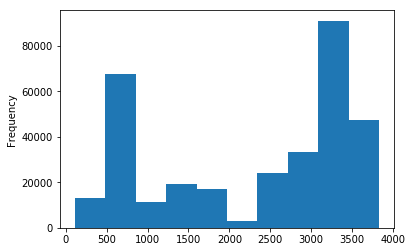

In [9]:
data['OFFENSE_CODE'].plot(kind = 'hist')

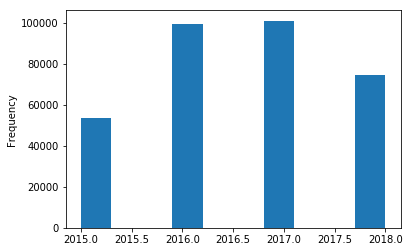

In [10]:
data['YEAR'].plot(kind = 'hist')

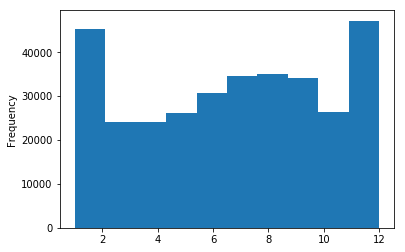

In [11]:
data['MONTH'].plot(kind = 'hist')

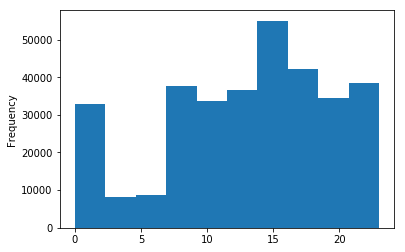

In [12]:
data['HOUR'].plot(kind = 'hist')

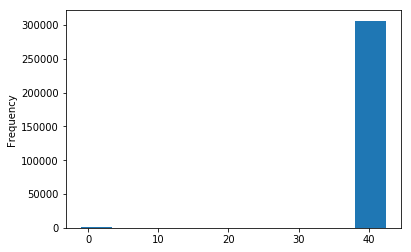

In [13]:
data['Lat'].plot(kind = 'hist')

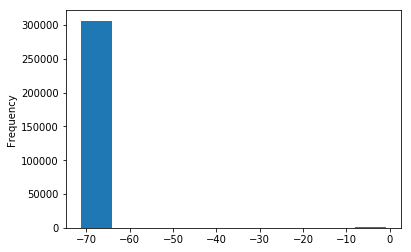

In [14]:
data['Long'].plot(kind = 'hist')

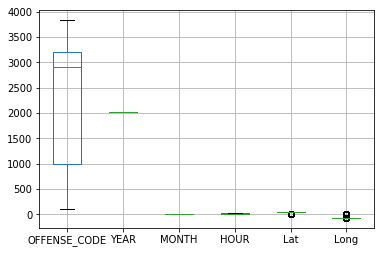

In [15]:
data.boxplot()

In [16]:
#Ubah NaN menjadi N
manps.loc[manps.SHOOTING.isna(), 'SHOOTING'] = 'N'

In [17]:
manps.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495        N   
1                 PROPERTY - LOST      D14            795        N   
2       THREATS TO DO BODILY HARM       B2            329        N   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92        N   
4              AIRCRAFT INCIDENTS       A7             36        N   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

No 1 a

In [55]:
p = len(manps.loc[manps["OFFENSE_CODE_GROUP"] == "Homicide"])/len(manps)

In [56]:
round(p*1000)

1

No 1 b

In [57]:
p = len(manps.loc[((manps["OFFENSE_CODE_GROUP"] == "Homicide") & (manps["SHOOTING"] == 'N'))])/len(manps)

In [58]:
round(p*1000)

0

No 1 c

In [59]:
p = len(manps.loc[((manps["HOUR"] == 20) & (manps['DAY_OF_WEEK'] == 'Saturday'))])/len(manps)

In [60]:
round(p*1000)

7

No 2 a

In [61]:
p = len(manps.loc[((manps["STREET"] == 'Geneva Ave') & (manps["STREET"] == 'Prescott Street'))])/len(manps)

In [62]:
round(p*2000)

0

No 2 b

In [63]:
p = len(manps.loc[((manps["DISTRICT"] == 'E18') & (manps["REPORTING_AREA"] == 495))])/len(manps)

In [64]:
round(p*2000)

0

No 2 c

In [65]:
p = len(manps.loc[((manps['DAY_OF_WEEK'] != 'Sunday') & (manps['DAY_OF_WEEK'] != 'Saturday'))])/len(manps)

In [66]:
round(p*2000)

1467